<a href="https://colab.research.google.com/github/Dadadaadad/TrabajosProgramacionAplicada/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf

batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [4]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/6
469/469 [==============================] - 17s 16ms/step - loss: 2.2641 - accuracy: 0.2865 - val_loss: 2.2221 - val_accuracy: 0.4371
Epoch 2/6
469/469 [==============================] - 7s 15ms/step - loss: 2.1669 - accuracy: 0.5907 - val_loss: 2.1005 - val_accuracy: 0.6778
Epoch 3/6
469/469 [==============================] - 7s 15ms/step - loss: 2.0129 - accuracy: 0.7116 - val_loss: 1.9015 - val_accuracy: 0.7437
Epoch 4/6
469/469 [==============================] - 7s 16ms/step - loss: 1.7592 - accuracy: 0.7577 - val_loss: 1.5817 - val_accuracy: 0.7751
Epoch 5/6
469/469 [==============================] - 7s 16ms/step - loss: 1.4031 - accuracy: 0.7760 - val_loss: 1.1993 - val_accuracy: 0.7958
Epoch 6/6
469/469 [==============================] - 7s 15ms/step - loss: 1.0574 - accuracy: 0.7951 - val_loss: 0.8997 - val_accuracy: 0.8174


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.899731457233429
Test accuracy: 0.8173999786376953


In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
model.predict(x_test[0:1,...])

array([[0.01796616, 0.01332458, 0.01406211, 0.02884818, 0.03880689,
        0.01453748, 0.0044241 , 0.75521594, 0.03841864, 0.07439587]],
      dtype=float32)

In [ ]:
y_test[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

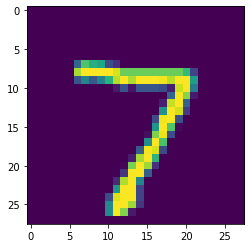

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0,...,0])


In [7]:
import numpy as np
predictions_one_hot = model.predict(x_test)
predictions = np.argmax(predictions_one_hot, axis=1)
expected =  np.argmax(y_test, axis=1)

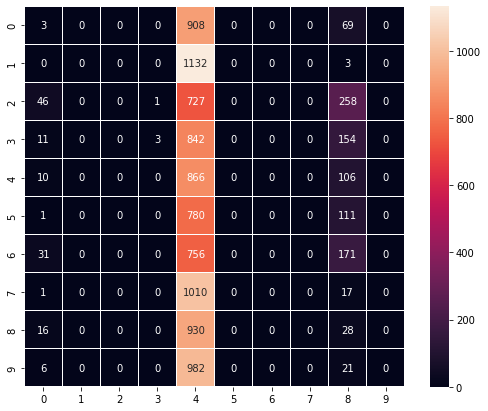

In [8]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(expected, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


Comarar los resultados con los obtenidos por https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb#scrollTo=VKnprnaSITc0